# **Pragya Sharma**
# **Task 1**

### **Prediction using Supervised ML**
Predict the percentage of an student based on the no. of study hours.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
%matplotlib inline

# Reading data from a URL

In [14]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Checking for null values (if any)

In [16]:
s_data.isna().sum()

Hours     0
Scores    0
dtype: int64

# Information about student dataset

In [17]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Descriptive analysis

In [18]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Scatter plot to show relationship between number of study hours and scores


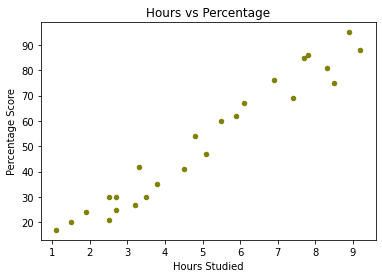

In [27]:
s_data.plot(x='Hours', y='Scores', style='o',kind='scatter',color='olive')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Defining the two variables for our regression model 

In [4]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

# Splitting the dataset into training and testing data

In [5]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Training the model 

In [6]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# Plotting the regression line

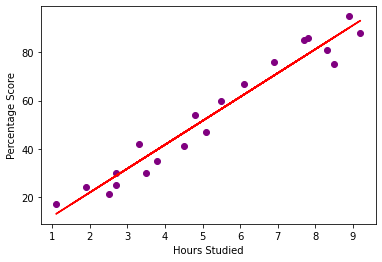

In [32]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the training data
plt.scatter(X_train, y_train,color='purple')
plt.plot(X, line,color='red');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Making Predictions from test data

In [35]:
print("This is the test data")
print(X_test) # Testing data(Hours Studied)
y_pred = regressor.predict(X_test) # Predicting the scores
print("These are the predicted percentage scores")
print(y_pred)

This is the test data
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
These are the predicted percentage scores
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Comparing actual and predicted precentage score

In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#**Prediction when student studied for 9.25 hours** 


In [12]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


# Evaluating the model

This step helps to compare how well different algorithms perform on the dataset. I have chosen mean absolute error and mean squared error.

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
